In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import netCDF4
from netCDF4 import Dataset
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

In [2]:
jan_u_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202101_u.nc')
feb_u_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202102_u.nc')
jan_t_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202101_t.nc')
feb_t_ds = xr.open_dataset('/langlab_rit/andrea/ERA5data/era5_202102_t.nc')

In [3]:
u_ds = xr.concat([jan_u_ds, feb_u_ds], dim='time')
t_ds = xr.concat([jan_t_ds, feb_t_ds], dim='time')

In [4]:
u_ds.time

<xarray.DataArray 'time' (time: 236)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T06:00:00.000000000',
       '2021-01-01T12:00:00.000000000', ..., '2021-02-28T06:00:00.000000000',
       '2021-02-28T12:00:00.000000000', '2021-02-28T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-02-28T18:00:00
Attributes:
    long_name:  time

In [5]:
t_ds.t

<xarray.DataArray 't' (time: 236, level: 19, latitude: 401, longitude: 1440)>
array([[[[256.1115 , 256.1115 , 256.1115 , ..., 256.1115 , 256.1115 ,
          256.1115 ],
         [255.68365, 255.68365, 255.68365, ..., 255.68365, 255.68365,
          255.68365],
         [255.26506, 255.26738, 255.26738, ..., 255.26276, 255.26276,
          255.26506],
         ...,
         [258.86362, 258.69016, 258.47275, ..., 258.9885 , 259.01624,
          258.9746 ],
         [258.27155, 258.12817, 257.94547, ..., 258.34555, 258.3849 ,
          258.35944],
         [257.73962, 257.6448 , 257.51532, ..., 257.6934 , 257.7697 ,
          257.78128]],

        [[245.5541 , 245.5541 , 245.5541 , ..., 245.5541 , 245.5541 ,
          245.5541 ],
         [245.30664, 245.30432, 245.30202, ..., 245.31358, 245.31126,
          245.30894],
         [244.95049, 244.94817, 244.94354, ..., 244.96436, 244.95973,
          244.95511],
...
         [294.159  , 294.0902 , 294.09427, ..., 293.83932, 293.91016,
          294.03763],
         [294.09628, 294.11652, 294.06998, ..., 293.92834, 293.98502,
          294.00323],
         [294.0538 , 294.11044, 294.07605, ..., 293.95062, 294.02344,
          294.02142]],

        [[250.77481, 250.77481, 250.77481, ..., 250.77481, 250.77481,
          250.77481],
         [250.51178, 250.51178, 250.51381, ..., 250.51178, 250.51178,
          250.51178],
         [250.26697, 250.26697, 250.26697, ..., 250.26495, 250.26495,
          250.26495],
         ...,
         [297.9728 , 297.8595 , 297.73206, ..., 297.86557, 297.78464,
          297.8069 ],
         [297.83118, 297.75024, 297.83524, ..., 297.81903, 297.80893,
          297.82916],
         [297.87973, 297.75632, 297.96875, ..., 297.8757 , 297.93842,
          298.01123]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -9.5 -9.75 -10.0
  * level      (level) int32 1 3 5 7 10 30 50 ... 300 400 500 700 850 925 1000
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-02-28T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [6]:
#this is selecting level = 10hPa and latitude = 60deg_N, and it calculates a daily mean
u_ds_rd = u_ds.sel(level = 10, latitude = 60).resample(time='1D').mean(dim='time')
t_ds_rd = t_ds.sel(latitude=slice(90,60), level = 10).resample(time='1D').mean(dim='time')

In [7]:
#Now calculating zonal means for u and v
u_zonal = u_ds_rd.mean(dim='longitude')
t_zonal = t_ds_rd.mean(dim=['longitude', 'latitude'])

In [8]:
start_date = u_zonal.time[3].values
end_date = u_zonal.time[19].values
cao_start = u_zonal.time[36].values

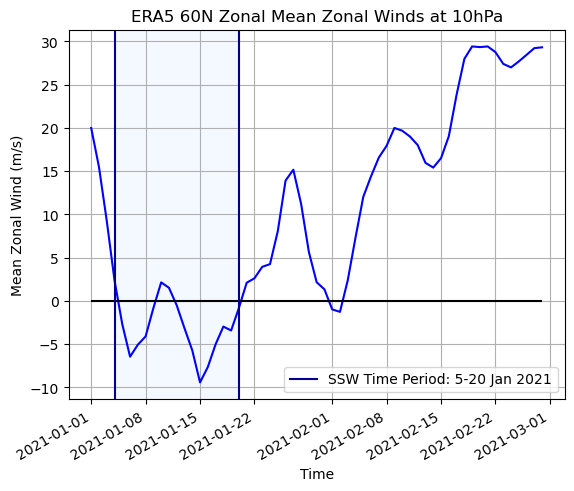

In [9]:
u_zonal.u.plot(color = 'blue')
#plt.plot(t_zonal.time, t_zonal.t, color='red')
plt.hlines(0, u_zonal.time[0], u_zonal.time[58], colors='black')
plt.axvline(x = start_date, color = 'darkblue', label = 'SSW Time Period: 5-20 Jan 2021')
plt.axvline(x = end_date, color = 'darkblue')
plt.axvspan(start_date, end_date, alpha=0.8, color='aliceblue')
plt.title('ERA5 60N Zonal Mean Zonal Winds at 10hPa')
plt.ylabel('Mean Zonal Wind (m/s)')
plt.xlabel('Time')
plt.grid(True)
plt.legend();

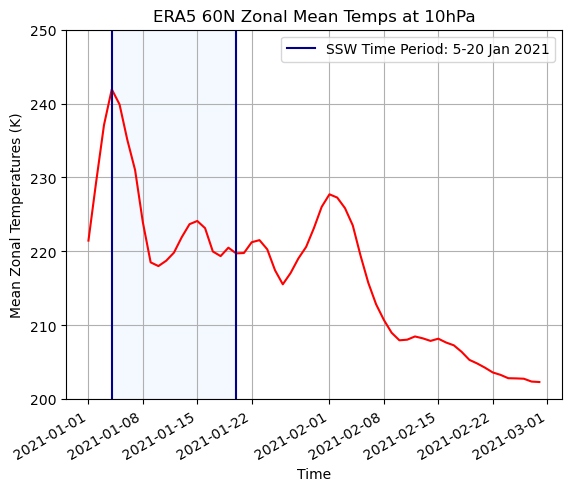

In [10]:
t_zonal.t.plot(color = 'red')
plt.hlines(0, u_zonal.time[0], u_zonal.time[58], colors='black')
plt.axvline(x = start_date, color = 'darkblue', label = 'SSW Time Period: 5-20 Jan 2021')
plt.axvline(x = end_date, color = 'darkblue')
plt.axvspan(start_date, end_date, alpha=0.8, color='aliceblue')
plt.title('ERA5 60N Zonal Mean Temps at 10hPa')
plt.ylabel('Mean Zonal Temperatures (K)')
plt.xlabel('Time')
plt.ylim(200,250)
plt.grid(True)
plt.legend();

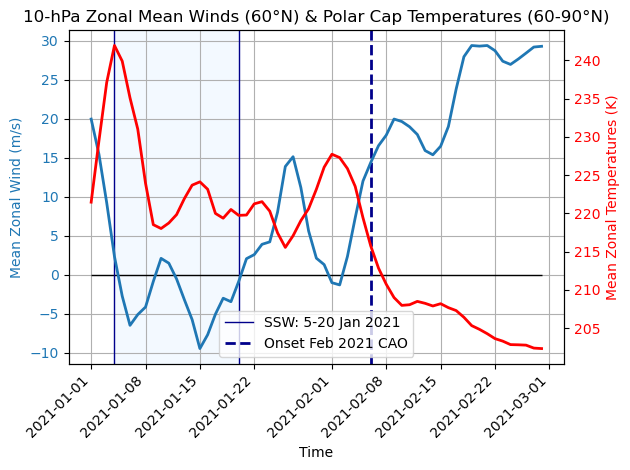

In [23]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Time')

ax1.set_ylabel('Mean Zonal Wind (m/s)', color=color)

ax1.hlines(0, u_zonal.time[0], u_zonal.time[58], colors='black', linewidth=1)
ax1.axvline(x = start_date, color = 'darkblue', label = 'SSW: 5-20 Jan 2021', linewidth=1)
ax1.axvline(x = end_date, color = 'darkblue', linewidth=1)
ax1.axvline(x = cao_start, color = 'darkblue', linewidth=2, label = 'Onset Feb 2021 CAO' , linestyle = '--')
ax1.axvspan(start_date, end_date, alpha=0.8, color='aliceblue')
ax1.plot(u_zonal.time, u_zonal.u, color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')
plt.title('10-hPa Zonal Mean Winds (60\u00b0N) & Polar Cap Temperatures (60-90\u00b0N)')
plt.grid()
plt.legend(loc = 'lower center')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'red'
ax2.set_ylabel('Mean Zonal Temperatures (K)', color=color2)  # we already handled the x-label with ax1
ax2.plot(t_zonal.time, t_zonal.t, color=color2, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()